# 「ガウス過程と機械学習」
# P28. 線形回帰モデル

In [1]:
using Plots

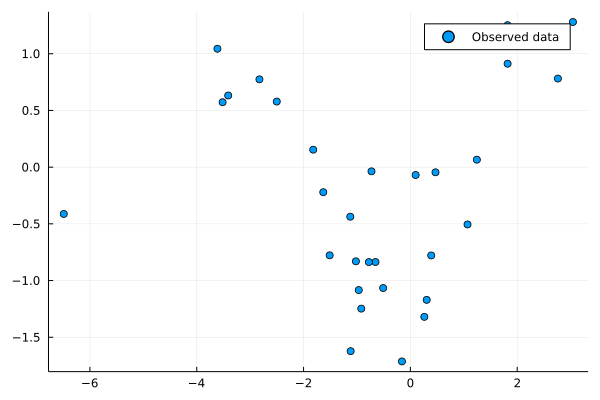

In [2]:
data = [
    2.7613622  0.7812694
    -2.5020371  0.5784024
    -0.6534198 -0.8364839
    -0.5093708 -1.0659939
    1.0698123 -0.5053178
    1.2444854  0.0656932
    -0.1583863 -1.7132896
    -1.8188962  0.1539270
    -3.6129367  1.0440645
    -2.8263055  0.7741641
    -1.0204458 -0.8304516
    0.2611304 -1.3202885
    -0.9667795 -1.0839772
    0.4701717 -0.0456008
    -0.7279929 -0.0369160
    0.3050133 -1.1703207
    0.3901433 -0.7787978
    3.0430492  1.2799983
    -1.6307559 -0.2210154
    -3.5160842  0.5724240
    -6.4898371 -0.4126926
    1.8201852  0.9120053
    -0.7767629 -0.8371592
    -3.4106994  0.6317732
    -0.9195992 -1.2476601
    -1.1248267 -0.4371627
    -1.5116412 -0.7774516
    1.8203302  1.2516907
    -1.1185539 -1.6227401
    0.0985207 -0.0693066
]

X = data[:, 1]
y = data[:, 2]
scatter(X, y, label="Observed data")

### 特徴ベクトルの計算
関数を、$\hat{y} = w_{0} + w_{1}x + w_{2}x^{2} + w_{3}\sin x　$　とした場合について考える。

In [3]:
N = length(X)
ϕ =　zeros(N, 4)
ϕ[:, 1] .= 1.0
ϕ[:, 2] = X
ϕ[:, 3] = [X[n] * X[n] for n in 1:N]
ϕ[:, 4] = sin.(X)
ϕ[1:5, :]

5×4 Matrix{Float64}:
 1.0   2.76136   7.62512    0.371134
 1.0  -2.50204   6.26019   -0.596839
 1.0  -0.65342   0.426957  -0.607905
 1.0  -0.509371  0.259459  -0.487628
 1.0   1.06981   1.1445     0.87711

### 線形モデルの解

In [4]:
w = inv(ϕ' * ϕ) * ϕ' * y

4-element Vector{Float64}:
 -0.3065218022123566
  0.07285273576369673
  0.04249691704801914
  0.46385157996684395

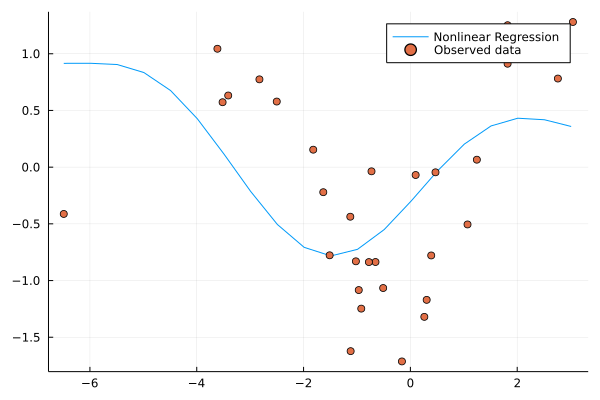

In [5]:
f(x) = w[1] + w[2] * x + w[3] * x^2 + w[4] * sin(x)
xs = minimum(X):0.5:maximum(X)
ys = f.(xs)
plot(xs, ys, label="Nonlinear Regression")
scatter!(X, y, label="Observed data")

関数に$\cos$項を加えた $\hat{y} = w_{0} + w_{1}x + w_{2}x^{2} + w_{3}\sin x + w_{4}\cos x$　の場合についても考える。

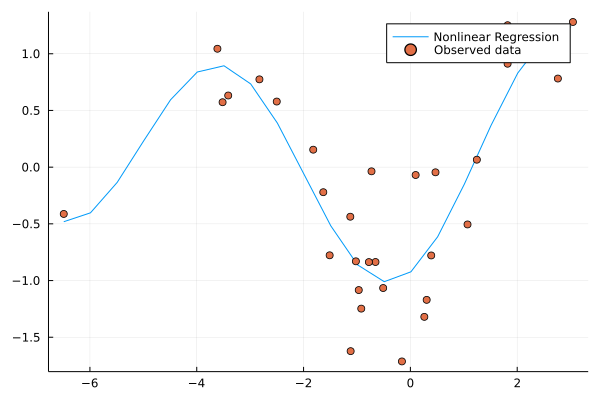

In [6]:
ϕ =　zeros(N, 5)
ϕ[:, 1] .= 1.0
ϕ[:, 2] = X
ϕ[:, 3] = [X[n] * X[n] for n in 1:N]
ϕ[:, 4] = sin.(X)
ϕ[:, 5] = cos.(X)

w = inv(ϕ' * ϕ) * ϕ' * y

f(x) = w[1] + w[2] * x + w[3] * x^2 + w[4] * sin(x) + w[5] * cos(x)
xs = minimum(X):0.5:maximum(X)
ys = f.(xs)
plot(xs, ys, label="Nonlinear Regression")
scatter!(X, y, label="Observed data")